## Segmentação de imagens por Crescimento de Região (Level Set)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import glob
import cv2
from skimage.exposure import equalize_hist
from skimage.segmentation import morphological_chan_vese
from skimage import io, color

C:\Users\Lucas Santos\AppData\Local\Temp\ipykernel_6272\2973982520.py:7: RuntimeWarning: divide by zero encountered in divide
  result_image = 1 / (1 + (k / image) ** E)


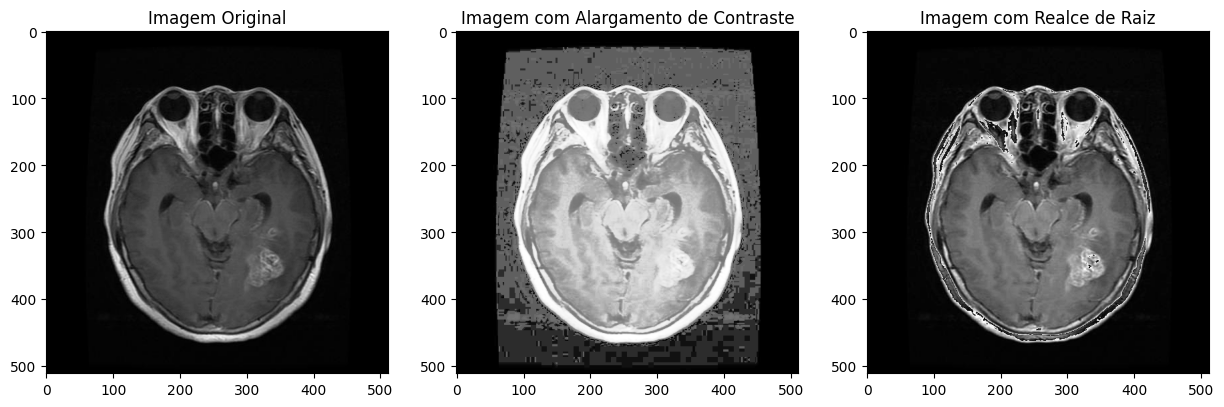

In [2]:
def alargam_contraste(image, k, E):
    # Verificar se a imagem é um array NumPy
    if not isinstance(image, np.ndarray):
        raise ValueError("A entrada deve ser uma matriz NumPy.")

    # Aplicar a transformação de alargamento de contraste à imagem
    result_image = 1 / (1 + (k / image) ** E)

    # Normalizar os valores resultantes para o intervalo [0, 255]
    result_image = (result_image * 255).astype(np.uint8)

    return result_image

# Função para aplicar a transformação de n-ésima potência em uma imagem
def power_transform(image, gamma):
    result = np.power(image, gamma)
    return result.astype(np.uint8)

# Carregar uma imagem em escala de cinza
# image = cv2.imread('images/modelo2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('imagens/gg.jpg', cv2.IMREAD_GRAYSCALE)

# Definir os parâmetros k e E (ajuste conforme necessário)
# k = 100
# E = 2

# k controla a inclinação da transformação e afeta a quantidade de alargamento.
# E controla a forma da curva de transformação e influencia como o contraste é ajustado.

# Aplicar a transformação de alargamento de contraste
equalized_image = equalize_hist(image)
# result_image = alargam_contraste(equalized_image, k = 2, E = 3)
result_image = alargam_contraste(image, k = 250, E = 1)

equalized_image2 = equalize_hist(result_image)

power_image = power_transform(image, gamma=1.1)


# Exibir a imagem original e a imagem resultante
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Imagem Original')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Imagem com Alargamento de Contraste')
plt.imshow(equalized_image2, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Imagem com Realce de Raiz')
plt.imshow(power_image, cmap='gray')
plt.show()

In [3]:
def region_growth_level_set(image, num_iter, init_level):
    # Convertendo a imagem para escala de cinza se necessário
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Aplicando o método Chan-Vese para segmentação
    segmented = morphological_chan_vese(image, num_iter=num_iter, init_level_set=init_level, smoothing=1, lambda1=1, lambda2=1)

    return segmented


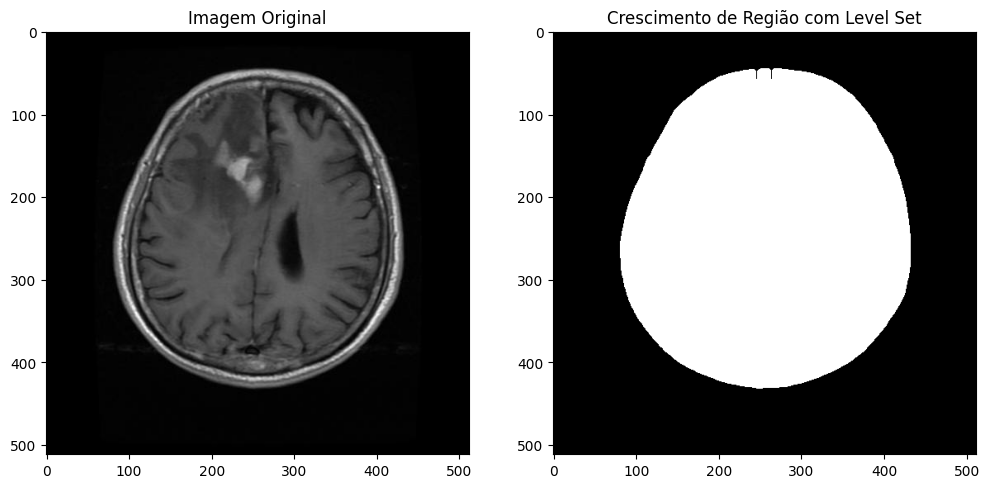

In [4]:

# Carregar a imagem
image_path = "glioma_tumor/gg (5).jpg"  # Substitua pelo caminho correto
image = io.imread(image_path)

# Aplicar o algoritmo de crescimento de região com Level Set
segmented_image = region_growth_level_set(image, num_iter = 200, init_level="disk")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Crescimento de Região com Level Set')

plt.show()


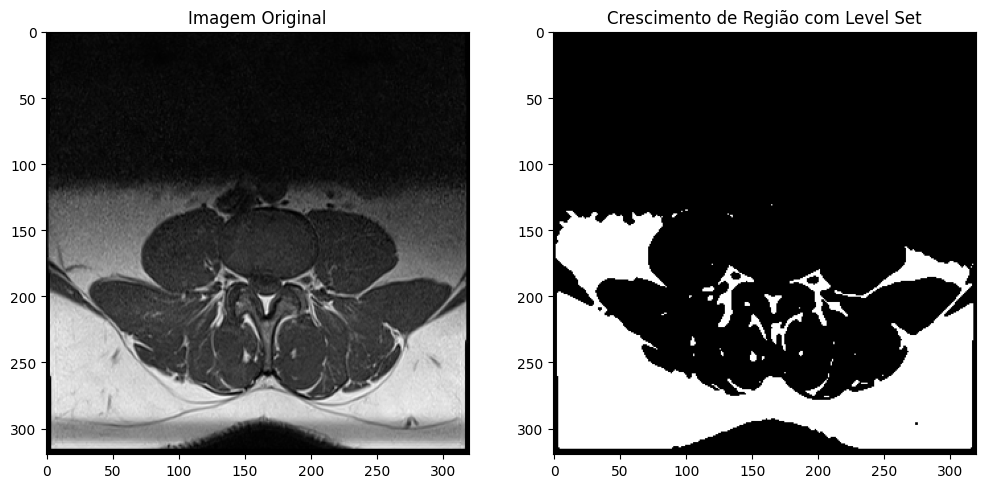

In [5]:
# Carregar a imagem
image_path = "imagens/T1_0001_D3.png"
image = io.imread(image_path)

# Aplicar o algoritmo de crescimento de região com Level Set
segmented_image = region_growth_level_set(image, num_iter = 300, init_level="checkerboard")

# Visualização dos resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Crescimento de Região com Level Set')

plt.show()



In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.segmentation import morphological_chan_vese

def segment_region_by_label(image, label_image, target_label, iterations=100, init_level_set="checkerboard"):
    # Criar uma máscara com base no rótulo desejado
    mask = (label_image == target_label)
    
    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image

    # Aplicar a função morphological_chan_vese para segmentação usando a máscara
    segmented = morphological_chan_vese(gray_image, num_iter=iterations, init_level_set=init_level_set, mask=mask)

    return segmented

def main():
    # Carregar a imagem
    image_path = "imagens/T1_0001_D3.png"  # Substitua pelo caminho correto
    image = io.imread(image_path)

    # Carregar a imagem de rótulos (label_image)
    label_image_path = "imagens/L1_0001_D3.png"  # Substitua pelo caminho correto
    label_image = io.imread(label_image_path, as_gray=True)

    # Escolher um rótulo (target_label) específico para segmentação
    target_label = 1  # Substitua pelo rótulo desejado

    # Aplicar a função para segmentar a região com base no rótulo
    segmented_region = segment_region_by_label(image, label_image, target_label)

    # Visualização dos resultados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Imagem Original')

    plt.subplot(1, 3, 2)
    plt.imshow(label_image, cmap='jet')
    plt.title('Imagem de Rótulos')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_region, cmap='gray')
    plt.title('Região Segmentada')

    plt.show()

if __name__ == "__main__":
    main()


TypeError: morphological_chan_vese() got an unexpected keyword argument 'mask'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.segmentation import morphological_chan_vese

def segment_region_by_label(image, label_image, target_label, iterations=100, init_level_set="checkerboard"):
    # Criar uma máscara com base no rótulo desejado
    mask = (label_image == target_label)

    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image

    # Aplicar a função morphological_chan_vese para segmentar a região da imagem de rótulos
    segmented_region = morphological_chan_vese(mask.astype(float), num_iter=iterations, init_level_set=init_level_set)

    # Aplicar a região segmentada à imagem original
    segmented_image = np.zeros_like(gray_image)
    segmented_image[mask] = segmented_region

    return segmented_image

def main():
    # Carregar a imagem
    image_path = "imagens/T1_0001_D3.png"  # Substitua pelo caminho correto
    image = io.imread(image_path)

    # Carregar a imagem de rótulos (label_image)
    label_image_path = "imagens/L1_0001_D3.png"  # Substitua pelo caminho correto
    label_image = io.imread(label_image_path, as_gray=True)

    # Escolher um rótulo (target_label) específico para segmentação
    target_label = 1  # Substitua pelo rótulo desejado

    # Aplicar a função para segmentar a região com base no rótulo
    segmented_region = segment_region_by_label(image, label_image, target_label)

    # Visualização dos resultados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Imagem Original')

    plt.subplot(1, 3, 2)
    plt.imshow(label_image, cmap='jet')
    plt.title('Imagem de Rótulos')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_region, cmap='gray')
    plt.title('Região Segmentada')

    plt.show()

if __name__ == "__main__":
    main()


TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

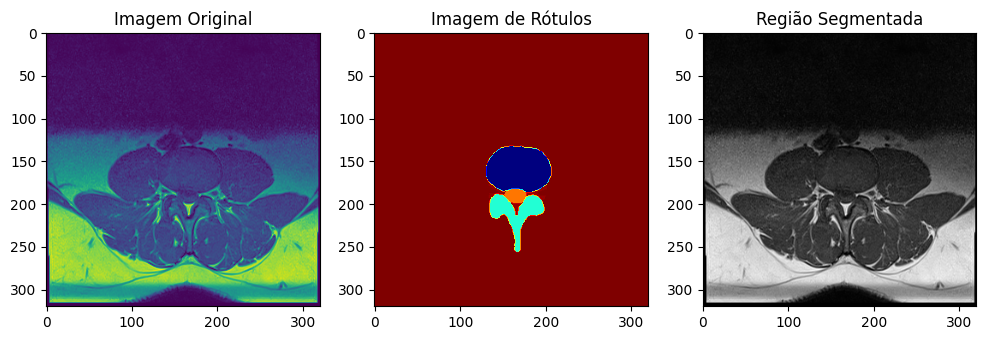

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.segmentation import morphological_chan_vese

def segment_region_by_label(image, label_image, target_label, iterations=300, init_level_set="checkerboard"):
    # Criar uma máscara com base no rótulo desejado
    mask = (label_image == target_label)

    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image

    # Aplicar a função morphological_chan_vese para segmentar a região da imagem de rótulos
    segmented_region = morphological_chan_vese(mask.astype(float), num_iter=iterations, init_level_set=init_level_set)

    # Aplicar a região segmentada à imagem original
    segmented_image = np.copy(gray_image)
    segmented_image[mask] = segmented_region[mask]

    return segmented_image

def main():
    # Carregar a imagem
    image_path = "imagens/T1_0001_D3.png"  # Substitua pelo caminho correto
    image = io.imread(image_path)

    # Carregar a imagem de rótulos (label_image)
    label_image_path = "imagens/L1_0001_D3.png"  # Substitua pelo caminho correto
    label_image = io.imread(label_image_path, as_gray=True)

    # Escolher um rótulo (target_label) específico para segmentação
    target_label = 1  # Substitua pelo rótulo desejado

    # Aplicar a função para segmentar a região com base no rótulo
    segmented_region = segment_region_by_label(image, label_image, target_label)

    # Visualização dos resultados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Imagem Original')

    plt.subplot(1, 3, 2)
    plt.imshow(label_image, cmap='jet')
    plt.title('Imagem de Rótulos')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_region, cmap='gray')
    plt.title('Região Segmentada')

    plt.show()

if __name__ == "__main__":
    main()


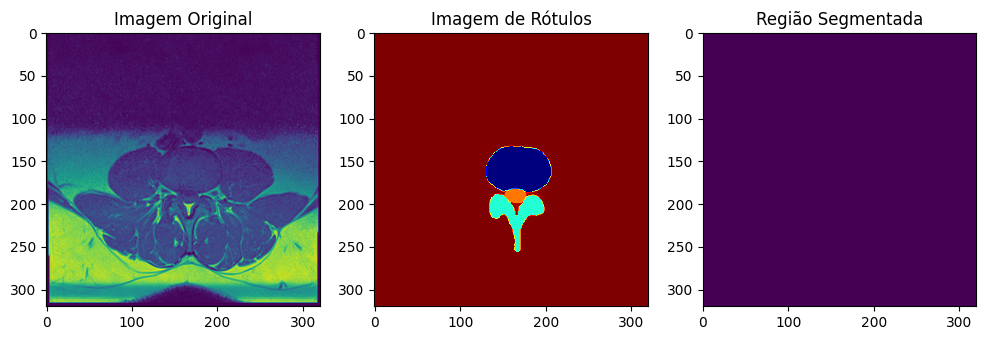

C:\Users\Lucas Santos\AppData\Local\Temp\ipykernel_18936\4025837836.py:59: UserWarning: imagens/labels/segmented_region.png is a low contrast image
  io.imsave(output_path, segmented_region)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.segmentation import morphological_chan_vese

def segment_region_by_label(image, label_image, target_label, iterations=100, init_level_set="checkerboard"):
    # Criar uma máscara com base no rótulo desejado
    mask = (label_image == target_label)

    # Converter a imagem para escala de cinza se necessário
    if image.ndim == 3:
        gray_image = color.rgb2gray(image)
    else:
        gray_image = image

    # Aplicar a função morphological_chan_vese para segmentar a região da imagem de rótulos
    segmented_region = morphological_chan_vese(mask.astype(float), num_iter=iterations, init_level_set=init_level_set)

    # Extrair a região segmentada da imagem original
    segmented_image = np.copy(image)
    segmented_image[~mask] = 0  # Configurar pixels fora da região segmentada para zero

    return segmented_image

def main():
    # Carregar a imagem
    image_path = "imagens/T1_0001_D3.png"  # Substitua pelo caminho correto
    image = io.imread(image_path)

    # Carregar a imagem de rótulos (label_image)
    label_image_path = "imagens/L1_0001_D3.png"  # Substitua pelo caminho correto
    label_image = io.imread(label_image_path, as_gray=True)

    # Escolher um rótulo (target_label) específico para segmentação
    target_label = 1  # Substitua pelo rótulo desejado

    # Aplicar a função para segmentar a região com base no rótulo
    segmented_region = segment_region_by_label(image, label_image, target_label)

    # Visualização dos resultados
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Imagem Original')

    plt.subplot(1, 3, 2)
    plt.imshow(label_image, cmap='jet')
    plt.title('Imagem de Rótulos')

    plt.subplot(1, 3, 3)
    plt.imshow(segmented_region)
    plt.title('Região Segmentada')

    plt.show()

    # Salvar a região segmentada em um novo arquivo
    output_path = "imagens/labels/segmented_region.png"  # Substitua pelo caminho desejado
    io.imsave(output_path, segmented_region)

if __name__ == "__main__":
    main()
